# Creación de una red neuronal convolucional

Vamos a usar el dataset de imágenes *CIFAR*

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values
train_images, test_images = train_images/255, test_images/255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

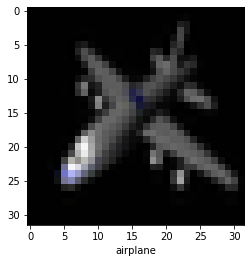

In [3]:
index = 4940
plt.figure()
plt.imshow(train_images[index])
plt.xlabel(class_names[train_labels[index][0]])
plt.show()

## Construcción de la red neuronal convolucional

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


La fase convolucional extrae los patrones fundamentales de las imágenes, pero no nos clasifica en las 10 clases que tenemos. Hay que crear una red de capas densas que decidan a qué clase pertenece cada combinación de patrones

In [7]:
model.add(layers.Flatten())  # aplanar en 1D
model.add(layers.Dense(64, activation='relu')) # 64 nodos densos
model.add(layers.Dense(10)) # 10 nodos de decisión para las 10 clases

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Entrenar el modelo

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# el from_logits implica que la función de pérdida no está normalizada, lo 
# que significa que no hay softmax en el modelo

history = model.fit(train_images, train_labels, epochs=7,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 8s 162us/sample - loss: 0.3696 - accuracy: 0.8666 - val_loss: 1.0947 - val_accuracy: 0.7040
Epoch 2/7
50000/50000 [==============================] - 7s 149us/sample - loss: 0.3440 - accuracy: 0.8760 - val_loss: 1.1286 - val_accuracy: 0.6972
Epoch 3/7
50000/50000 [==============================] - 7s 148us/sample - loss: 0.3201 - accuracy: 0.8844 - val_loss: 1.2125 - val_accuracy: 0.6968
Epoch 4/7
50000/50000 [==============================] - 8s 153us/sample - loss: 0.3035 - accuracy: 0.8912 - val_loss: 1.2660 - val_accuracy: 0.6917
Epoch 5/7
50000/50000 [==============================] - 8s 160us/sample - loss: 0.2845 - accuracy: 0.8974 - val_loss: 1.2981 - val_accuracy: 0.6993
Epoch 6/7
50000/50000 [==============================] - 7s 137us/sample - loss: 0.2692 - accuracy: 0.9021 - val_loss: 1.3655 - val_accuracy: 0.6905
Epoch 7/7
50000/50000 [==============================] -

### Evaluar el modelo

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 1.3778 - accuracy: 0.6960


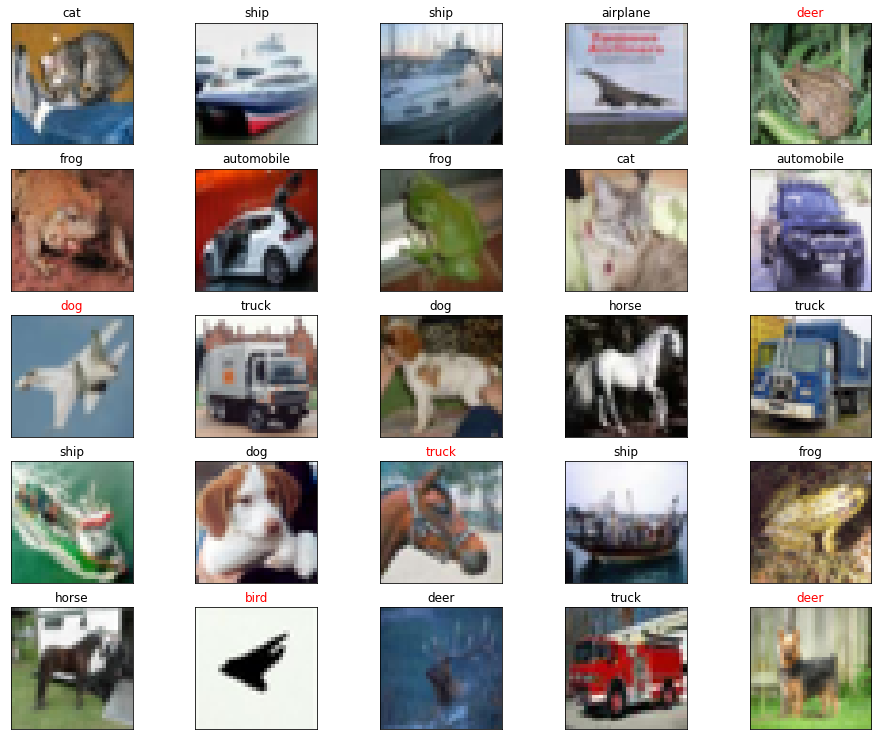

In [24]:
predictions = model.predict(test_images)

f, ax = plt.subplots(5,5,figsize=(16,13))
i=0
for a in ax.reshape(-1):
    a.imshow(test_images[i])
    a.set_xticks([])
    a.set_yticks([])
    
    pred = class_names[predictions[i].argmax()]
    real = class_names[test_labels[i][0]]
    
    if pred == real:
        a.set_title(pred, c="k")
    else:
        a.set_title(pred, c="r")
    i += 1
    
plt.show()

## Trabajar con datasets pequeños

Es difícil crear una red neuronal convolucional desde 0 si se tiene un dataset pequeño, como es este caso. Por ello podemos usar modelos ya entrenados y Data Augmentation para obetener resultados mejores. Esto consiste en dividir una imagen en varias y dársela al modelo.

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# crear un generador de datos que transforma imágenes
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [31]:
# elegir una imagen para transformar
test_im = train_images[67]
img = image.img_to_array(test_im) # conver image to numpy array
img = img.reshape((1,) + img.shape) # reshape

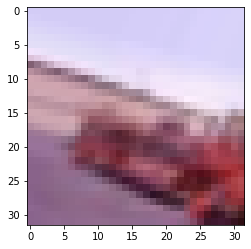

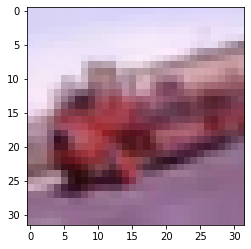

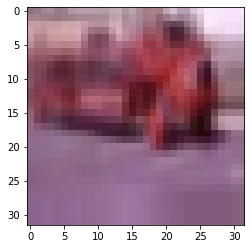

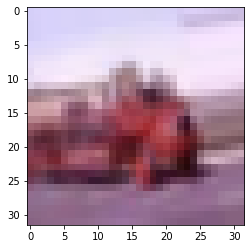

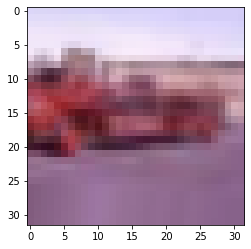

In [32]:
i=0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
plt.show()

### Modelo pre-entrenado

El modelo ya hecho es bueno en procesar aspectos generales de imágenes como los bordes o fondos. Después, le pasaremos las capas convolucionales propias de nuestro problema por encima.

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [37]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# dividir los datos en 80% entrenamiento, 10% testeo y 10% validación
(raw_train, raw_validation, raw_test), metadata =tfds.load(
    'cats_vs_dogs',
    split=[
        tfds.Split.TRAIN.subsplit(tfds.percent[:80]),
        tfds.Split.TRAIN.subsplit(tfds.percent[80:90]),
        tfds.Split.TRAIN.subsplit(tfds.percent[90:])
    ],
    with_info=True,
    as_supervised=True)

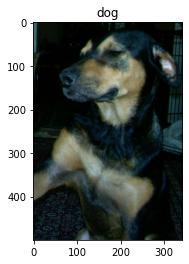

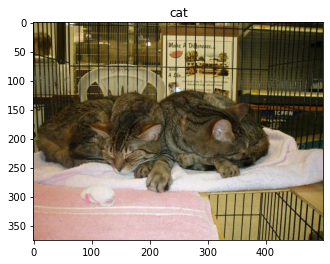

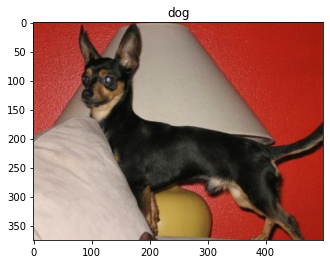

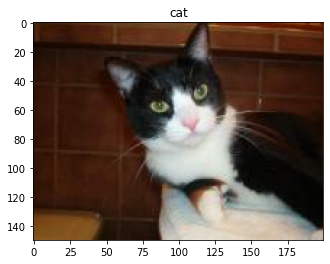

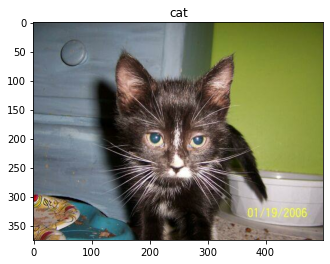

In [44]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

Como vemos ninguna de estas imágenes tiene el mismo tamaño. Hay que reescalarlas

In [45]:
# vamos a hacer todas las imágenes de 160x160
IMG_SIZE = 160

def format_example(image, label):
    """
    devuelve la imagen reescalada
    """
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1 # la mitad de 255
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [47]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

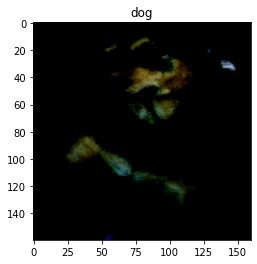

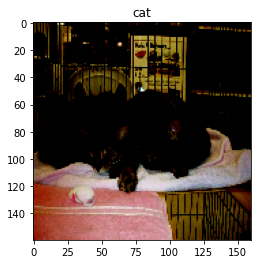

In [48]:
for image, label in train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [60]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [49]:
for img, label in raw_train.take(2):
    print("Original shape: ", img.shape)
    
for img, label in train.take(2):
    print("New shape: ", img.shape)

Original shape:  (500, 343, 3)
Original shape:  (375, 500, 3)
New shape:  (160, 160, 3)
New shape:  (160, 160, 3)


#### Escoger un modelo pre-entrenado

In [51]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# crear el modelo base del ya creado MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 3s 0us/step


In [52]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

Vemos que el output del modelo base es (5,5,1280), que es una extracción de nuestra imagen de (160,160,3)

In [61]:
for image, _ in train_batches.take(1):
    pass
feature_batch=base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


#### Congelar la base

No queremos volver a entrenar el modelo base, ya está optimizado.

In [54]:
base_model.trainable=False

#### Añadir el clasificador

In [55]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# esto hace la media del output de 5x5 y nos da un unico vector de 1280
# elementos por filtro

In [56]:
prediction_layer = tf.keras.layers.Dense(1)

In [57]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


#### Entrenar el modelo

In [59]:
base_learning_rate = 0.0001 # cuanto permito que cambien los pesos y sesgos
model.compile(optimizer=keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
# vamos a evaluar el modelo antes de entrenarlo para ver como se comporta la base
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

20/20 [==============================] - 3s 148ms/step - loss: 0.8596 - accuracy: 0.4703


In [63]:
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 43s 75ms/step - loss: 0.4159 - accuracy: 0.7819 - val_loss: 0.1713 - val_accuracy: 0.9060
Epoch 2/3
582/582 [==============================] - 39s 67ms/step - loss: 0.2070 - accuracy: 0.9138 - val_loss: 0.1315 - val_accuracy: 0.9306
Epoch 3/3
582/582 [==============================] - 40s 68ms/step - loss: 0.1677 - accuracy: 0.9301 - val_loss: 0.1182 - val_accuracy: 0.9388
[0.7819246, 0.9137579, 0.9300827]


In [65]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5")